In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(os.path.join('..', 'data', 'processed', 'job_offers_2024_03_18.csv'), sep=';', encoding='utf-8')
df

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_currency,salary_avg,is_senior
0,Senior Data Engineer,Showpad,"['Data', 'SQL', 'Data Lake', 'Python']",data engineer,Wrocław,PL,22000,30000,PLN,26000.0,1
1,Senior Data Engineer - Remote,Link Group,"['Data', 'SQL', 'Data pipelines', 'Cloud compu...",data engineer,Zdalna,B/D,26880,31920,PLN,29400.0,1
2,Snowflake Data Engineer,GTV POLAND,"['Data', 'Snowflake', 'ETL', 'Python']",data engineer,Zdalna,B/D,14000,18000,PLN,16000.0,0
3,Data Engineer,Finture,"['Data', 'Bash', 'GCP', 'Storage']",data engineer,Warszawa,PL,20000,27000,PLN,23500.0,0
4,Senior Data Engineer (Azure),GetInData | Part of Xebia,"['Data', 'Microsoft azure', 'Python', 'SQL']",data engineer,Zdalna,B/D,26880,33600,PLN,30240.0,1
...,...,...,...,...,...,...,...,...,...,...,...
109,DevOps Engineer (DataOps),Avenga,"['DevOps', 'Data analyst', 'Python', 'SQL']",data analyst,Zdalna,B/D,27720,31080,PLN,29400.0,0
110,Data Engineer,Avenga,"['Business Intelligence', 'Data analyst', 'BI'...",data analyst,Warszawa,PL,25200,31080,PLN,28140.0,0
111,Data Engineer,Profitroom,"['Data', 'Data analyst', 'Spark', 'Data engine...",data analyst,Zdalna,B/D,14900,21400,PLN,18150.0,0
112,Inżynier / Analityk danych,Dogtronic Solutions,"['Data', 'Data analyst', 'SQL', 'BigQuery']",data analyst,Warszawa,PL,19950,28350,PLN,24150.0,0


### Ile ofert pracy dla poszczególnego stanowiska zostało znalezione?

In [5]:
job_offers = df.groupby(by=['job']).size()
job_offers

job
data analyst      29
data engineer     62
data scientist    23
dtype: int64

<Axes: xlabel='job'>

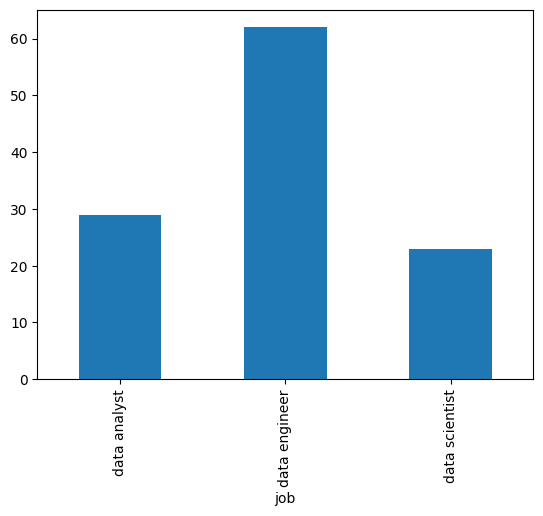

In [6]:
job_offers.plot(kind='bar')

In [7]:
job_city_offers = df.groupby(by=['location_city', 'job']).size()
job_city_offers

location_city  job           
Budapest       data analyst       2
               data engineer      6
               data scientist     2
Gdańsk         data analyst       2
Gdynia         data scientist     1
Katowice       data analyst       1
               data engineer      1
               data scientist     1
Kraków         data analyst       4
               data engineer      6
               data scientist     1
Poznań         data analyst       1
               data engineer      1
Szczecin       data analyst       1
               data engineer      1
Warszawa       data analyst       5
               data engineer     15
               data scientist     3
Wrocław        data engineer      2
               data scientist     1
Zdalna         data analyst      13
               data engineer     30
               data scientist    14
dtype: int64

<Axes: xlabel='location_city,job'>

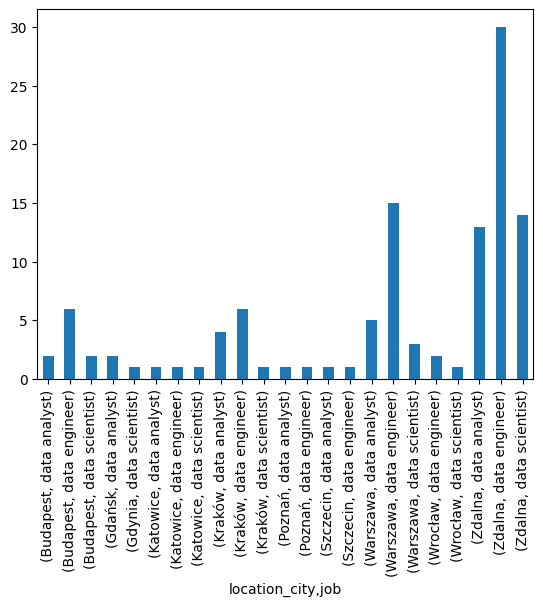

In [8]:
job_city_offers.plot(kind='bar')

### Jak kształtują się średnie zarobki dla poszczególnych zawodów?

In [14]:
job_offers = df.groupby(by=['job']).agg({'salary_avg': 'mean', 'name': 'count'})
job_offers.sort_values(by=['name'], inplace=True)
job_offers

,salary_avg,name
job,,
data scientist,23207.608696,23
data analyst,19146.672414,29
data engineer,23080.330645,62


array([[<Axes: title={'center': 'salary_avg'}, xlabel='job'>],
       [<Axes: title={'center': 'name'}, xlabel='job'>]], dtype=object)

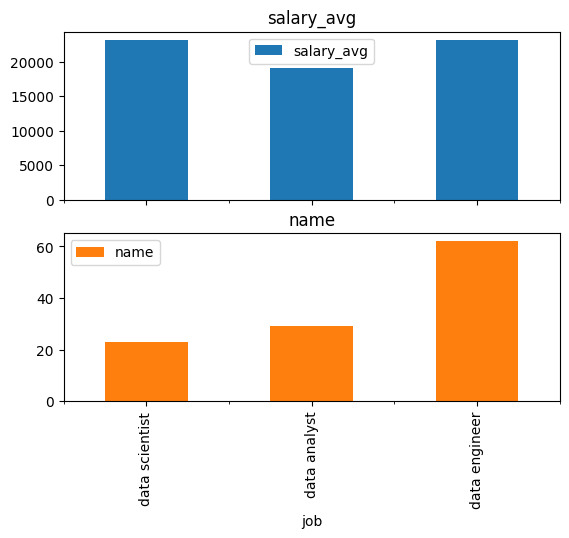

In [18]:
job_offers.plot(kind='bar', subplots=True, layout=(2, 1))

### W którym mieście jest najwięcej ofert pracy?

In [22]:
job_salary_by_city = df.groupby(by=['location_city']).agg({'name': 'count', 'salary_avg': 'mean'})
job_salary_by_city.sort_values(by=['salary_avg'], inplace=True)
job_salary_by_city.rename(columns={'name': 'count'})
job_salary_by_city['salary_avg'] = job_salary_by_city['salary_avg'].round(decimals=2)
job_salary_by_city


,name,salary_avg
location_city,,
Budapest,10,11131.50
Katowice,3,16000.00
Poznań,2,16350.00
Szczecin,2,18500.00
Gdynia,1,19320.00
Gdańsk,2,19440.00
Warszawa,23,22672.02
Kraków,11,23585.91
Zdalna,57,24180.57


<Axes: xlabel='location_city'>

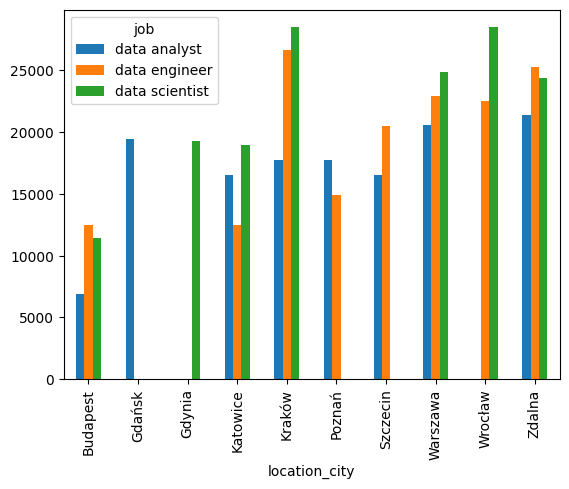

In [25]:
df.pivot_table(index='location_city', columns='job', values='salary_avg').plot(kind='bar')

### Gdzie jest oferowana najwyższa stawka?

In [28]:
job_max_salary_by_city = df.groupby(by=['location_city']).agg({'salary_high': 'max'}).sort_values(by=['salary_high'], ascending=False)
job_max_salary_by_city

,salary_high
location_city,
Warszawa,60000
Zdalna,48300
Kraków,40000
Wrocław,32000
Gdańsk,28560
Szczecin,27000
Budapest,23916
Katowice,22000
Gdynia,21840


### Jaki jest najniższy możliwy koszt zatrudnienia zespołu złożonego z data analyst, data engineer oraz data scientist?

In [31]:
job_min_team_cost = df.groupby(by=['job']).agg({'salary_low': 'min'}).sum()
job_min_team_cost

salary_low    17066
dtype: int64

### Czy w jednym mieście poszukuje się wszystkich trzech ofert? Jeśli tak to gdzie by było najtaniej?


In [ ]:
job_all_three_offers = df.groupby(by=['location_city', 'job']).agg

In [36]:
x = df.pivot_table(index='location_city', columns='job', values='salary_low').dropna()
x['team_min_cost'] = x[['data analyst', 'data engineer', 'data scientist']].sum(axis=1)
x

job,data analyst,data engineer,data scientist,team_min_cost
location_city,,,,
Budapest,5272.000000,9511.666667,8152.500000,22936.166667
Katowice,15000.000000,9000.000000,16000.000000,40000.000000
Kraków,15870.000000,22000.000000,25000.000000,62870.000000
Warszawa,17710.000000,18230.000000,20514.666667,56454.666667
Zdalna,18346.230769,21991.466667,20589.428571,60927.126007
